# Regresión lineal
En este ejercicio implementarás la solución analítica de regresión lineal. Además, investigarás la influencia de los puntos extremos en el modelo. Antes de empezar importaremos las librerias necesarias. Después, leeremos el archivo que contiene los datos de entrenamiento.

**(TODO) Describe la diferencia entre regresión y clasificación en una oración**

La clasificacion tiene la tarea de asignar una clase mientras que la regresión predice valores contínuos.

## Ejercicio:
En la siguiente parte queremos implementar la solución de mínimos cuadrados para regresión lineal. Esto significa que dado un set de puntos $\{\mathbf{x_i},y_i\}$, $i = 1, 2, ..., M$ queremos encontrar la línea (o hiperplano en múltiples dimensiones) que minimice el error cuadrático. Este tipo de error, mide la distancia entre los puntos predichos por el modelo lineal contra los valores reales.

La fórmula general de regresión lineal es $\mathbf{y} = \mathbf X \boldsymbol w+ \mathbf{\epsilon}$ donde:

- $\epsilon$ es un vector de dimensionalidad $\mathbb{R}^M$ conteniendo los términos de error $N(0,\sigma^2)$
- $\mathbf{y}$ es el vector de etiquedas
- $\mathbf{X}$ es la *matriz* de data points de dimensionalidad $\mathbb{R}^{M \times D}$. 

Nos interesa calcular los pesos $\hat{\boldsymbol w}$ que definan la función lineal óptima. Como vimos en clase, estos estimados están dados por:

\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

**Tu trabajo**
1. En el primer ejercicio, generaremos un ruido gausiano de dos dimensiones alrededor de una función lineal. Observa como se general los datos y cuáles son los parámetros reales de $\boldsymbol{w}$.
2. Implementarás la solución analítica de regresión lineal. Para ello debes realizar los siguientes pasos.
    1. Modifica la matriz de datos para que se encuentre en la forma de notación aumentada.
    2. Calcula los pesos estimados según la fórmula vista en clase, usando las funciones de numpy y python.
    3. Visualiza la línea resultante (el modelo) en la misma gráfica que de los datos originales.
    3. Calcula la suma de errores residuales de los data points y estima un promedio i.e. $\sum_{i=1}^M \|y(x_i) - y_i \|^2$.
    5. Compara tus resultados con la función integrada de numpy `np.linalg.lstsq(...)`
3. Finalmente, repite los pasos anteriores para generar un modelo de regresión lineal que resuelva del problema de las casas.

## 1. "Toy problem"

(100, 1)
(100, 1)
(2, 1)


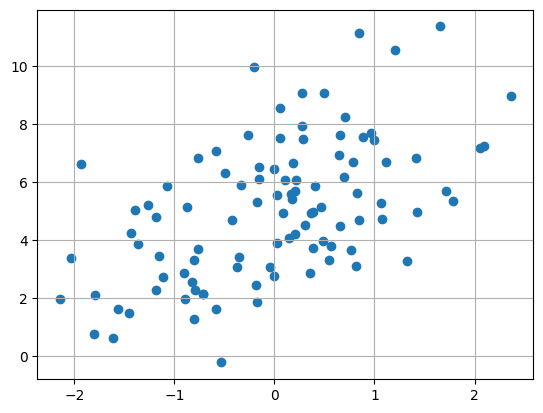

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generamos datos aleatorios con una desviación estandar conocida
## Alrededor de una funcion lineal conocida y = 1.2x + 5
n_muestras = 100
ruido_blanco_std = 2
X = np.random.randn(n_muestras, 1)
eps = np.random.randn(n_muestras, 1) * ruido_blanco_std
w = np.array([[5, 1.2]]).T
y = w[0] + X * w[1] + eps

## Imprimimos la dimensionalidad de nuestros datos de entrada y las etiquetas
print(X.shape)  # X es de n_muestras, 1 (variable)
print(y.shape)
print(w.shape)

## Graficar los datos
plt.scatter(X, y)
plt.grid()

## 2. Solución a regresión lineal

In [2]:
# 2.1. TODO: Transforma los datapoints X a notación aumentada
# Tips: 
#   - Imprime la forma/dimensionalidad de la matriz con print(X.shape) y verifica que sea del tamaño adecuado
#   - Investiga la función de numpy np.concatenate y np.ones
n = X.shape[0]
ones = np.ones((n, 1))
print(ones.shape)
print(X.shape)

X_augmented = np.concatenate((ones,X), axis=1, out=None, dtype=None, casting="same_kind")
print(X_augmented.shape)
print(X_augmented)

(100, 1)
(100, 1)
(100, 2)
[[ 1.          0.30199035]
 [ 1.          1.4146521 ]
 [ 1.         -1.4590401 ]
 [ 1.          2.36292355]
 [ 1.         -2.03346241]
 [ 1.          0.16154157]
 [ 1.          0.14412191]
 [ 1.          0.69655263]
 [ 1.          0.40920188]
 [ 1.         -1.79491862]
 [ 1.         -1.3599183 ]
 [ 1.          0.8414141 ]
 [ 1.          1.06295209]
 [ 1.          0.76486609]
 [ 1.         -0.82365512]
 [ 1.          0.84762269]
 [ 1.         -0.18959771]
 [ 1.          0.65153734]
 [ 1.          1.78721781]
 [ 1.         -1.93726205]
 [ 1.         -0.15713164]
 [ 1.         -0.71582356]
 [ 1.         -1.6125987 ]
 [ 1.         -0.87772958]
 [ 1.         -1.80136451]
 [ 1.         -0.00921386]
 [ 1.         -1.15193579]
 [ 1.          0.21642137]
 [ 1.          1.20185782]
 [ 1.         -1.11055424]
 [ 1.          0.96836766]
 [ 1.          0.995752  ]
 [ 1.          0.35939014]
 [ 1.         -0.35406618]
 [ 1.          1.71804097]
 [ 1.         -2.14549586]
 

In [3]:
# 2.2 TODO: usa la ecuación anterior (X'X)^(-1)X'Y para calcular los pesos
# Consejo: 
#       Utiliza np.dot() o @ para calcular la multiplicación de matrices
#       np.linalg.inv() se usa para calcular la matriz inversa
#       X.T es la transpuesta de X
print(y.shape)
w_hat=np.linalg.inv((X_augmented.T)@X_augmented)
w_hat=w_hat@(X_augmented.T)
w_hat=w_hat@y
print(w_hat.shape)
print(w_hat)

(100, 1)
(2, 1)
[[5.05712547]
 [1.3240212 ]]


(100, 1)


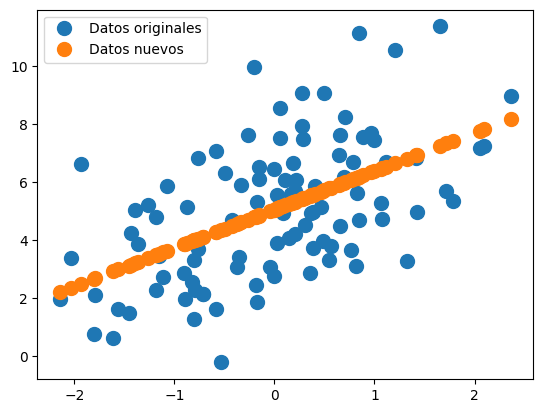

In [4]:
# 2.3 TODO: Calcula las predicciones de tu modelo

y_hat = np.dot(X_augmented,w_hat)
print(y_hat.shape)

plt.plot(X, y, 'o', label='Datos originales', markersize=10)

# TODO: Grafica las predicciones/ la linea resultante
plt.plot(X, y_hat, 'o', label='Datos nuevos', markersize=10)


plt.legend()

C:\Users\faria\AppData\Local\Temp\ipykernel_8784\3043863292.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c, m = np.linalg.lstsq(X_augmented, y)[0]


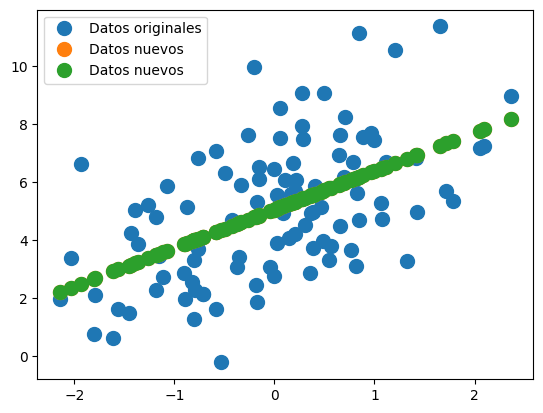

Residuales mios:  [[-0.93127866]
 [-0.08811187]
 [-1.64742336]
 [ 0.79400378]
 [ 1.00258007]
 [ 0.32998108]
 [-1.1842    ]
 [ 0.1924149 ]
 [ 0.26533325]
 [-0.56614474]
 [ 0.62292   ]
 [ 4.97698268]
 [-1.17353116]
 [-2.39982149]
 [-1.41089398]
 [-1.47400789]
 [-2.35139534]
 [ 1.71873477]
 [-2.06993378]
 [ 4.12030331]
 [ 1.66448846]
 [-1.97938619]
 [-2.28809706]
 [ 1.24442516]
 [-1.92288046]
 [-2.27566573]
 [-0.08601536]
 [ 0.74559733]
 [ 3.9045016 ]
 [-0.87412887]
 [ 1.36934302]
 [ 1.07749823]
 [-2.67112413]
 [-1.17547053]
 [-1.64197112]
 [-0.24125051]
 [ 1.83148011]
 [-2.45420617]
 [ 3.35640602]
 [ 1.10344119]
 [-1.47398069]
 [ 0.14860305]
 [ 3.65993978]
 [-1.99643306]
 [-1.84746348]
 [ 0.16922667]
 [ 2.91035405]
 [ 0.58074805]
 [ 1.31909777]
 [ 1.90504385]
 [-3.52504288]
 [-1.43288488]
 [-1.35349147]
 [-0.53501035]
 [-0.65834463]
 [ 1.00824887]
 [-4.5662143 ]
 [-2.69459394]
 [ 0.37933216]
 [ 2.2197466 ]
 [-0.58241518]
 [ 1.30631311]
 [-1.74665844]
 [-1.20413819]
 [ 0.49597522]
 [-1.92

In [5]:
## 2.4 TODO: Calcula la suma de errores cuadrádos
residual_mio = np.subtract(y,y_hat)

c, m = np.linalg.lstsq(X_augmented, y)[0]
y_hat2 = m*X + c

## 2.5 TODO: Compara los resultados con la función integrada de numpy 'np.linalg.lstsq'
residual_numpy = y-y_hat2


# Graficando
plt.plot(X, y, 'o', label='Datos originales', markersize=10)

# TODO: Grafica la linea resultante de TU modelo como en la sección anterior
plt.plot(X, y_hat, 'o', label='Datos nuevos', markersize=10)

# TODO: Grafica la linea resultante de numpy como en la sección anterior
plt.plot(X, y_hat2, 'o', label='Datos nuevos', markersize=10)
plt.legend()
plt.show()

# TODO: Imprime y compara la suma de errores cuadrádos calculado por TU metodo y el de numpy
print("Residuales mios: ", residual_mio)
print("Residuales numpy:", residual_numpy)

## 3. El efecto de las anomalías

En esta sección analizaremos los datos del problema de las casas para buscar una solución a través de regresión lineal.

Para ello observaremos los datos y aplicaremos un modelo de regresión lineal a los mismos. Después realizarás los mismo pasos en un conjunto con datos filtrados a fin de encontrar un mejor modelo.

Tu trabajo:
1. Utiliza la librería de scikit-learn para encontrar la solución de regresión lineal para el problema de las casas usando el **conjunto de datos de entrenamiento (train_data)**
2. Calcula el error cuadrático en el **conjunto de validación (val_data)**.
3. Repite los dos pasos anteriores para los datos filtrados y observa la diferencia.

In [6]:
# Importar librerias
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [7]:
import pandas as pd
import os
def read_data(data_dir, file):
    path = os.path.abspath(os.path.join(data_dir, file))
    print(path)
    df = pd.read_csv(path)
    return df

# Leer los datasets
data_dir = "../../datasets/house_prices"
data = read_data(data_dir, "train.csv")

# Filtrar los datos para seleccionar las columnas de interes
# y dejar solo los datos del 2010
selected_dim = ["LotArea", "SalePrice"]
data = data[data["YrSold"] <= 2009]
data = data[selected_dim]

# Separamos los datos en diferentes conjuntos
n_datapoints = len(data)
train_data = data[:-n_datapoints//4]
val_data = data[-n_datapoints//4:]

c:\Users\faria\Documents\Sem6\SI24_LosCapybaros\src\si24\datasets\house_prices\train.csv


## Visualización
En la siguiente celda visualizamos los datos originales. Observa como contine una distribución densa para cases con un area menor a 50k sqft y un precio menor a 600k USD, y por otro lado contiene datos escasos fuera de estos rangos.

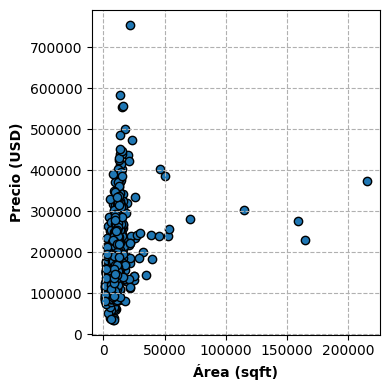

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(x, labels):
    x_label = "Área (sqft)"
    y_label = "Precio (USD)"
    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(x, labels, edgecolors='black') # x, y
    ax.set_ylabel(y_label, fontweight='bold')
    ax.set_xlabel(x_label, fontweight='bold')
    ax.grid(linestyle='--')
    return fig, ax

# Definir variables y etiquetas
X = np.array(train_data["LotArea"])
y = np.array(train_data["SalePrice"])

# Visualizar los datos originales
fig, ax = plot_data(X, y)
fig.tight_layout()
plt.show()

### Regresión en datos originales

Primero aplicaremos regresión lineal a los datos íntegros para observar el efecto de conservar los datos extremos en el entrenamiento del modelo.

Puedes consultar la documentación de sci-kit learn para  [regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) en línea para obtener detalles de como utilizar la función.

[ 3.02052927e+04  1.19171177e+03  4.03026609e+04 -4.02207412e+04
  6.15323318e+04 -4.52137819e+04  1.25844257e+05  1.83224768e+04
 -4.43150174e+04 -5.84912392e+04 -5.36097921e+04  1.60622527e+05
 -4.22054538e+04  9.73497230e+04 -2.56195289e+04 -4.22150174e+04
 -9.23936577e+04 -2.84783871e+04 -3.77363708e+04  1.36911124e+05
 -3.71420165e+04  4.94430783e+04 -4.09952353e+04  6.78848600e+04
  1.54236447e+04 -1.06072209e+05 -1.38382254e+05 -2.91092957e+04
 -2.94540015e+03  1.01196111e+05  1.22006623e+05 -3.75127216e+04
 -2.54382844e+04 -9.20749422e+04 -1.86589028e+04 -2.30989042e+04
 -3.55728935e+04 -4.93579123e+04 -3.64104827e+04  5.37361834e+04
  6.67723057e+04 -5.83014534e+04 -5.00550419e+04 -1.07830507e+04
 -5.99251302e+04  1.33479235e+05 -4.59904704e+04 -8.15078674e+02
  4.36949879e+03  1.26110397e+04  2.51324375e+05 -5.12060325e+04
 -2.83875516e+04 -7.51060325e+04  2.77211800e+04  3.95856732e+04
  1.36707470e+05  4.38269608e+04  3.41983289e+04  5.65986542e+04
 -4.73046575e+04  3.74445

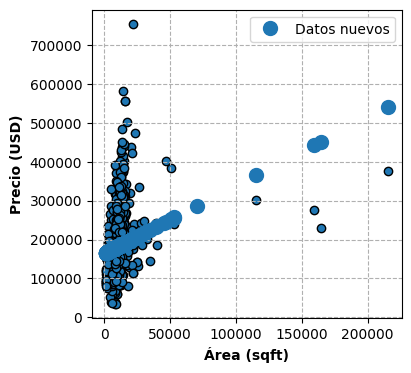

In [9]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1, 1)

# TODO: Usas la funcion integrada de scikit learn para encontrar un modelo de regresión lineal que se ajuste a los datos de entrenamiento y obtén las predicciones
modelo = LinearRegression().fit(X,y)
predict= modelo.predict(X) #pendiente

# Graficamos los datos originales
fig, ax = plot_data(X, y)
# TODO: Grafica la linea resultante sobre los datos originales
plt.plot(X,predict, 'o', label='Datos nuevos', markersize=10)
plt.legend()

# TODO: calcula el error cuadrado promedio
mean_error = y-predict
print(mean_error)

## Pre-procesamiento de datos
Como observamos, estos datos presentan múltiples valores aislados lo que afecta la solución de regresión lineal. 

En la siguiente sección, remueve los valores aislados y repite los pasos anteriores para encontrar un modelo de regresión lineal. C

Calcula el error cuadrático los datos filtrados. 

(TODO: Responde) ¿Cuál es el efecto de pre procesar los datos?
Te permite obtener una mejor regresion lineal gracias a que modificaras los datos que no 'sirven' o te afectan tu pendiente

C:\Users\faria\AppData\Local\Temp\ipykernel_8784\1224664093.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_data_filtrada = train_data_filtrada[train_data["SalePrice"] <= 470000] #Filtrando datos de y


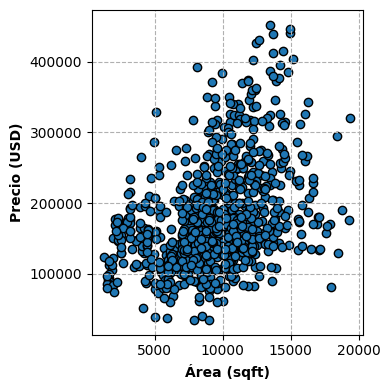

In [10]:
# TODO: Remueve los outliers seleccionando un valor que consideres apropiado (filtra los valores de LotArea y  SalePrice=) hasta que los datos se encuentren densamente concentrados en una región
train_data_filtrada = train_data[train_data["LotArea"] <= 20000] #Filtrando datos de x para optimizar
train_data_filtrada = train_data_filtrada[train_data["SalePrice"] <= 470000] #Filtrando datos de y

# Definir variables y etiquetas
X_filtered = np.array(train_data_filtrada["LotArea"])
y_filtered = np.array(train_data_filtrada["SalePrice"])

# Graficar de nuevo
fig, ax = plot_data(X_filtered, y_filtered)
fig.tight_layout()
plt.show()

### Regresión en datos filtrados

4220087559.2464724
diferencia de error [-4.22005735e+09 -4.22008637e+09 -4.22004726e+09 -4.22012778e+09
 -4.22002603e+09 -4.22013277e+09 -4.21996171e+09 -4.22006924e+09
 -4.22013187e+09 -4.22014605e+09 -4.22014117e+09 -4.21992694e+09
 -4.22012976e+09 -4.21999021e+09 -4.22011318e+09 -4.22012977e+09
 -4.22017995e+09 -4.22011604e+09 -4.22012530e+09 -4.21995065e+09
 -4.22012470e+09 -4.22003812e+09 -4.22012855e+09 -4.22001967e+09
 -4.22007214e+09 -4.22019363e+09 -4.22022594e+09 -4.22011667e+09
 -4.22009050e+09 -4.21998636e+09 -4.21996555e+09 -4.22012507e+09
 -4.22011300e+09 -4.22017963e+09 -4.22010622e+09 -4.22011066e+09
 -4.22012313e+09 -4.22013692e+09 -4.22012397e+09 -4.22003382e+09
 -4.22002079e+09 -4.22014586e+09 -4.22013761e+09 -4.22009834e+09
 -4.22014748e+09 -4.21995408e+09 -4.22013355e+09 -4.22008837e+09
 -4.22008319e+09 -4.22007495e+09 -4.21983623e+09 -4.22013877e+09
 -4.22011595e+09 -4.22016267e+09 -4.22005984e+09 -4.22004797e+09
 -4.21995085e+09 -4.22004373e+09 -4.22005336e+09 -4

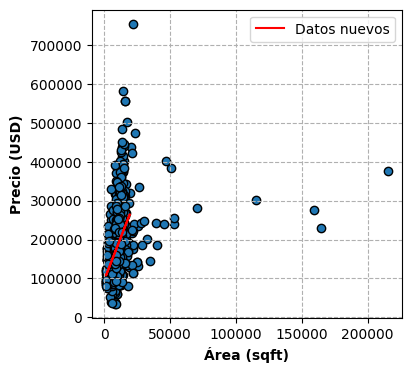

In [11]:
X_filtered = X_filtered.reshape(-1, 1)

# TODO: Utiliza la clase de LinearRegression de la librería de sci-kit learn para encontrar el modelo de regresión lineal para los datos.
modelo=LinearRegression().fit(X_filtered,y_filtered)
predictNew= modelo.predict(X_filtered) #pendiente

# TODO: Grafica la linea resultante sobre los datos originales (train_data)
fig, ax = plot_data(X, y)
plt.plot(X_filtered, predictNew, label='Datos nuevos', markersize=10, color = "r")
plt.legend()

# TODO: calcula el error cuadrado promedio

error_sklearn_new = (y_filtered - predictNew)**2
mean_error_new= np.mean(error_sklearn_new)
# Visualiza como cambia el error cuando filtramos los datos
print(mean_error_new)
print("diferencia de error", mean_error - mean_error_new)

## TODO: Responde las siguientes preguntas

**¿Qué puedes concluir de este ejemplo?**

Ciertos valores pueden tener un efecto distinguido en el resultado final, especialmente los datos usados en el entrenamiento. Se puede observar como la gráfica del modelo resultante se inclina hacia abajo al convervar todos los valores de x y y como datos de entrenamiento, a lo que puede reusltar como un beneficio el filtrar los datos a un parámetro en el que se repitan la mayoría de las predicciones, básicamente, aquellos datos con mayor exactitud y precisión. El resultado de este filtro resulat en una gráfica más compacta e inclinada para arriba, ya que ahora solo está siendo afectada por los datos filtrados y las predicciones establecidas por medio del nuevo modelo.

**¿Cuál de las dos soluciones es un mejor modelo de nuestros datos?**

La segunda solución demuestra una lógica que consideramos mucho más efectiva, ya que pueden existir ciertos datos fuera del parámetro común, a lo que se pueden tomar como datos particulares que podrían ser excluidos para obtener así un modelo capaz de predecir datos que se encuentren dentro del parámetro promedio. Sin embargo, esta solución solo funciona con un grupo de datos conocidos, no aleatorio, ya que se aplica el filtro tomando en consideración el comportamiento consistente de estos datos y sus predicciones. Aún así, esta solución aún equivale a un modelo más certero a la mayoría de los datos, mientras que la primera solución, a pesar de usar datos aleatorios, crea un modelo que se ve afectado por estos valores particulares.

**¿Además de filtrar los datos, qué estrategias puedes tomar para penalizar más levemente a los valores aislados?**

Se podrían usar dichos datos excluidos para crear un segundo modelo que podría señalar un segundo comportamiento que describa a los valores de x que sobrepasen el límite del filtro. 